In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import pycode

In [2]:
b, nu, E = sympy.symbols("b nu E", real=True, positive=True)
x_d, y_d, z_d = sympy.symbols("x_d y_d z_d", real=True)

u_x = (b / (2 * sympy.pi)) * (
    sympy.atan(y_d / x_d) + ((x_d * y_d) / (2 * (1 - nu) * (x_d**2 + y_d**2)))
)

u_y = -(b / (2 * sympy.pi)) * (
    ((1 - 2 * nu) / (4 * (1 - nu))) * sympy.ln(x_d**2 + y_d**2)
    + ((x_d**2 - y_d**2) / (4 * (1 - nu) * (x_d**2 + y_d**2)))
)

In [3]:
dux_dx = sympy.Derivative(u_x, x_d).simplify().simplify()
duy_dy = sympy.Derivative(u_y, y_d).simplify().simplify()
dux_dy = sympy.Derivative(u_x, y_d).simplify().simplify()
duy_dx = sympy.Derivative(u_y, x_d).simplify().simplify()

In [4]:
beta = sympy.Matrix(
    [
        [dux_dx, dux_dy, 0],
        [duy_dx, duy_dy, 0],
        [0, 0, 0],
    ],
    real=True,
)
coord = sympy.Matrix([x_d, y_d, z_d], real=True)

In [5]:

x = sympy.Symbol("x", real=True)
y = sympy.Symbol("y", real=True)
dx = sympy.Symbol("dx", real=True, positive=True)
I = sympy.integrate(beta[0, 0], (x_d, x, x+dx), (y_d, y, y+dx))
(I / dx**2).simplify().simplify()

# du / dx*(I / dx**2).simplify().simplify()dx

b*(-x*log(x**2 + y**2) + x*log(x**2 + (dx + y)**2) + (dx + x)*log(dx**2 + 2*dx*x + x**2 + y**2) - (dx + x)*log(dx**2 + 2*dx*x + x**2 + (dx + y)**2) + 2*(nu - 1)*(dx*log(dx**2 + 2*dx*x + x**2 + y**2) - dx*log(dx**2 + 2*dx*x + x**2 + (dx + y)**2) - x*log(x**2 + y**2) + x*log(x**2 + (dx + y)**2) + x*log(dx**2 + 2*dx*x + x**2 + y**2) - x*log(dx**2 + 2*dx*x + x**2 + (dx + y)**2) - 2*y*atan(x/y) + 2*y*atan((dx + x)/y) + 2*(dx + y)*atan(x/(dx + y)) - 2*(dx + y)*atan((dx + x)/(dx + y))))/(8*pi*dx**2*(nu - 1))

In [8]:
def curl(tensor, coord):
    e = np.array(  # Levi-Civita symbol
        [
            [[0, 0, 0], [0, 0, 1], [0, -1, 0]],
            [[0, 0, -1], [0, 0, 0], [1, 0, 0]],
            [[0, 1, 0], [-1, 0, 0], [0, 0, 0]],
        ]
    )
    out = sympy.Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]], real=True)
    for i in range(3):
        for l in range(3):
            for j in range(3):
                for k in range(3):
                    if e[i, j, k] != 0:
                        out[i, l] += (
                            e[i, j, k]
                            * sympy.Derivative(tensor[k, l], coord[j]).simplify()
                        )
    for i in range(3):
        for j in range(3):
            out[i, j] = out[i, j].simplify().simplify()
    return out

In [9]:
def get_alpha(beta, coord):
    e = np.array(  # Levi-Civita symbol
        [
            [[0, 0, 0], [0, 0, 1], [0, -1, 0]],
            [[0, 0, -1], [0, 0, 0], [1, 0, 0]],
            [[0, 1, 0], [-1, 0, 0], [0, 0, 0]],
        ]
    )
    out = sympy.Matrix([[0, 0, 0], [0, 0, 0], [0, 0, 0]], real=True)
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    out[i, j] += (
                        e[i, k, l] * sympy.Derivative(beta[l, j], coord[k]).simplify()
                    )
    for i in range(3):
        for j in range(3):
            out[i, j] = out[i, j].simplify().simplify()
    return out

In [10]:
alpha = curl(beta, coord)
alpha
# # dx  dy  dz  dx  dy  dz
# # b11 b21 b31 b11 b21 b31
# alpha_31 = sympy.Derivative(beta[1, 0], x_d).simplify() - sympy.Derivative(beta[0, 0], y_d).simplify()
# display(alpha_31.simplify())
# display(alpha[2,0])


a1 = sympy.Symbol("a1", real=True, positive=True)
a2 = sympy.Symbol("a2", real=True, positive=True)
integral = sympy.integrate(alpha[2, 0], (x_d, -a1, a1), (y_d, -a2, a2))
display(alpha)
display(integral)


Matrix([
[                                                           0,                                                    0, 0],
[                                                           0,                                                    0, 0],
[b*(x_d**2 - y_d**2)/(pi*(x_d**4 + 2*x_d**2*y_d**2 + y_d**4)), 2*b*x_d*y_d/(pi*(x_d**4 + 2*x_d**2*y_d**2 + y_d**4)), 0]])

-4*b*atan(a2/a1)/pi

In [11]:
alpha = curl(beta, coord)
div = sympy.Matrix([0, 0, 0], real=True)
for i in range(3):
    for j in range(3):
        div[j] += sympy.Derivative(alpha[i, j], coord[i]).simplify()
div

Matrix([
[0],
[0],
[0]])

In [12]:
xhat = sympy.Matrix([1, 0, 0], real=True, positive=True)
yhat = sympy.Matrix([0, 1, 0], real=True, positive=True)
zhat = sympy.Matrix([0, 0, 1], real=True, positive=True)


In [13]:
def cartesian_box_surface_integral(nhat, tensor, x_d, y_d):
    a1 = sympy.Symbol("a1", real=True, positive=True)
    a2 = sympy.Symbol("a2", real=True, positive=True)

    v = nhat.T * tensor
    return [
        sympy.integrate(v[i], (x_d, -a1, a1), (y_d, -a2, a2))
        # sympy.integrate(v[i], (y_d, -a2, a2), (x_d, -a1, a1))
        .simplify()
        .simplify()
        for i in range(3)
    ]

In [14]:
out = cartesian_box_surface_integral(zhat, alpha, x_d, y_d)  # [0, 2b]
display(out[0])
display(out[1])
display(out[2])

-4*b*atan(a2/a1)/pi

0

0

In [15]:
# This integral is divergent, the field is non-sense close to the core...
f = b * (x_d**2 - y_d**2) / (sympy.pi* (x_d**4 + 2 * (x_d**2) * (y_d**2) + y_d**4) )
# lime x=sqrt(2)*y => 0 : y^2 / 2*y^4 + 4y^2 + y^4  prop to 1/y^2
#f = 1 / (sympy.pi* (x_d**4 + 2 * (x_d**2) * (y_d**2) + y_d**4) )
#display((alpha[2, 0] - f).simplify())
a1 = sympy.Symbol("a1", real=True, positive=True)
a2 = sympy.Symbol("a2", real=True, positive=True)
i1 = sympy.integrate(f, (y_d, -a1, a1), (x_d, -a1, a1))
i2 = sympy.integrate(f, (x_d, -a1, a1), (y_d, -a1, a1)) # cannot change bounds!
display((i1 - i2).simplify().simplify())
display(i1.simplify())
display(i2.simplify())


2*b

b

-b

In [16]:
def norm(tensor):
    n = 0
    for i in range(3):
       for j in range(3):
           n += (tensor[i,j]*tensor[i,j])
    return n.simplify()
norm(alpha)

b**2/(pi**2*(x_d**4 + 2*x_d**2*y_d**2 + y_d**4))

In [17]:
a1 = sympy.Symbol("a1", real=True, positive=True)
a2 = sympy.Symbol("a2", real=True, positive=True)
i1 = sympy.integrate(alpha[2, 0], (y_d, -a2, a2), (x_d, -a1, a1))
i2 = sympy.integrate(alpha[2, 0], (x_d, -a1, a1), (y_d, -a2, a2))
display(i1 - i2)


4*b*atan(a2/a1)/pi + 4*b*atan(a1/a2)/pi

In [18]:
def circuit_integral(tensor, y_d, x_d):
    a1 = sympy.Symbol("a1", real=True, positive=True)
    a2 = sympy.Symbol("a2", real=True, positive=True)
    # This is the corresponding burguir circuit
    # TODO: try to do this on the numpy arrays, then also in the flipped coord system
    # put in paper the approximation of the burgers vector for instance.

    # NOTE that we cannot borh flip integral signs and integrand direction....
    # dl = +xhat => beta_11, beta_21

    _a1 = (
        sympy.integrate(+tensor[0, 0].subs(y_d, -a2), (x_d, -a1, a1))
        .simplify()
        .simplify()
    )
    _a2 = (
        sympy.integrate(+tensor[1, 0].subs(y_d, -a2), (x_d, -a1, a1))
        .simplify()
        .simplify()
    )
    # dl = yhat => beta_21, beta_22
    _b1 = (
        sympy.integrate(+tensor[0, 1].subs(x_d, a1), (y_d, -a2, a2))
        .simplify()
        .simplify()
    )
    _b2 = (
        sympy.integrate(+tensor[1, 1].subs(x_d, a1), (y_d, -a2, a2))
        .simplify()
        .simplify()
    )
    # dl = -xhat => beta_11, beta_21
    _c1 = (
        sympy.integrate(-tensor[0, 0].subs(y_d, a2), (x_d, -a1, a1))
        .simplify()
        .simplify()
    )
    _c2 = (
        sympy.integrate(-tensor[1, 0].subs(y_d, a2), (x_d, -a1, a1))
        .simplify()
        .simplify()
    )
    # dl = -yhat => beta_21, beta_22
    _d1 = (
        sympy.integrate(-tensor[0, 1].subs(x_d, -a1), (y_d, -a2, a2))
        .simplify()
        .simplify()
    )
    _d2 = (
        sympy.integrate(-tensor[1, 1].subs(x_d, -a1), (y_d, -a2, a2))
        .simplify()
        .simplify()
    )

    return [(_a1 + _b1 + _c1 + _d1).simplify(), (_a2 + _b2 + _c2 + _d2).simplify(), 0]


In [19]:
out = circuit_integral(beta, y_d, x_d)
display(out[0])
display(out[1])
display(out[2])

2*b*(atan(a2/a1) + atan(a1/a2))/pi

0

0

In [21]:
sympy.atan(y_d / x_d), (sympy.atan(x_d / y_d)).simplify().simplify()

(atan(y_d/x_d), atan(x_d/y_d))

In [22]:
q1, q2 = 1.21375, 3.234
np.arctan(q1 / q2) + np.arctan(q2 / q1), np.pi / 2.0

(1.5707963267948966, 1.5707963267948966)

In [23]:
a1, a2 = sympy.symbols("a1 a2", real=True, positive=True)
expr = sympy.atan(a1 / a2) + sympy.atan(a2 / a1)
expr.simplify().simplify()

atan(a2/a1) + atan(a1/a2)

In [24]:
print(
    pycode(alpha[2, 0])
    .replace("x_d", "x")
    .replace("y_d", "y")
    .replace("z_d", "z")
    .replace("math", "np")
    .replace("nu", "v")
    .replace("b", "bmag")
)
print(
    pycode(alpha[2, 1])
    .replace("x_d", "x")
    .replace("y_d", "y")
    .replace("z_d", "z")
    .replace("math", "np")
    .replace("nu", "v")
    .replace("b", "bmag")
)


bmag*(x**2 - y**2)/(np.pi*(x**4 + 2*x**2*y**2 + y**4))
2*bmag*x*y/(np.pi*(x**4 + 2*x**2*y**2 + y**4))


In [203]:
bmag = np.linalg.norm(2.86 * np.array([1, -1, 0]) * 1e-4)
v = 0.334
alpha_31 = lambda x, y: bmag * (x**2 - y**2) / (np.pi * (x**4 + 2 * x**2 * y**2 + y**4))
alpha_32 = lambda x, y: 2 * bmag * x * y / (np.pi * (x**4 + 2 * x**2 * y**2 + y**4))


/tmp/ipykernel_4505/1679918516.py:3: RuntimeWarning: invalid value encountered in divide
  alpha_31 = lambda x, y: bmag * (x**2 - y**2) / (np.pi * (x**4 + 2 * x**2 * y**2 + y**4))
/tmp/ipykernel_4505/1679918516.py:4: RuntimeWarning: invalid value encountered in divide
  alpha_32 = lambda x, y: 2 * bmag * x * y / (np.pi * (x**4 + 2 * x**2 * y**2 + y**4))


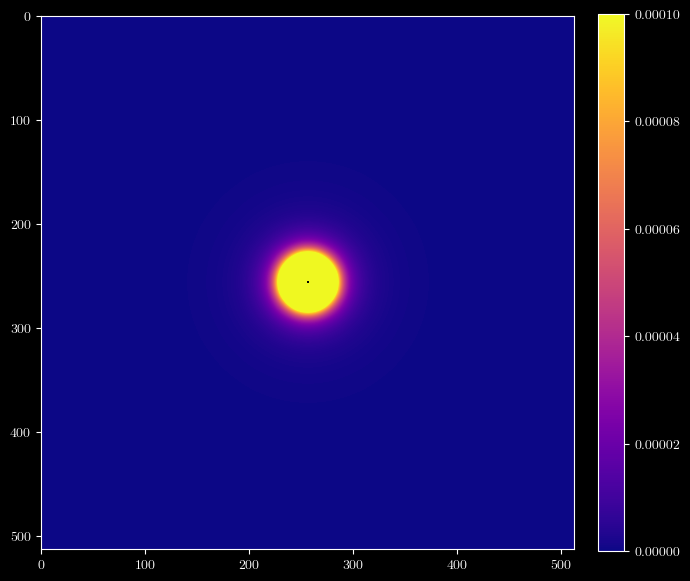

In [204]:
xg = np.linspace(-1, 1, 513)
yg = np.linspace(-1, 1, 513)
X, Y = np.meshgrid(xg, yg, indexing="ij")

Z1 = alpha_31(X, Y)
Z2 = alpha_32(X, Y)
Z = Z1**2 + Z2**2
Z = Z
plt.style.use("dark_background")
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
im = ax.imshow(Z, cmap="plasma", vmin=0, vmax=0.0001)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [205]:
(Z*X).sum()/(Z.sum()), (Z*Y).sum()/(Z.sum())

(nan, nan)

In [206]:
Z[256,256]

nan

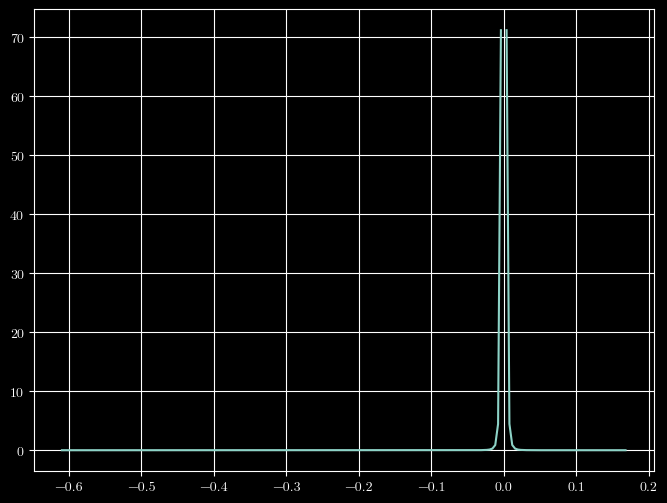

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(xg[100:300], Z[256, 100:300])
plt.grid(True)
plt.show()

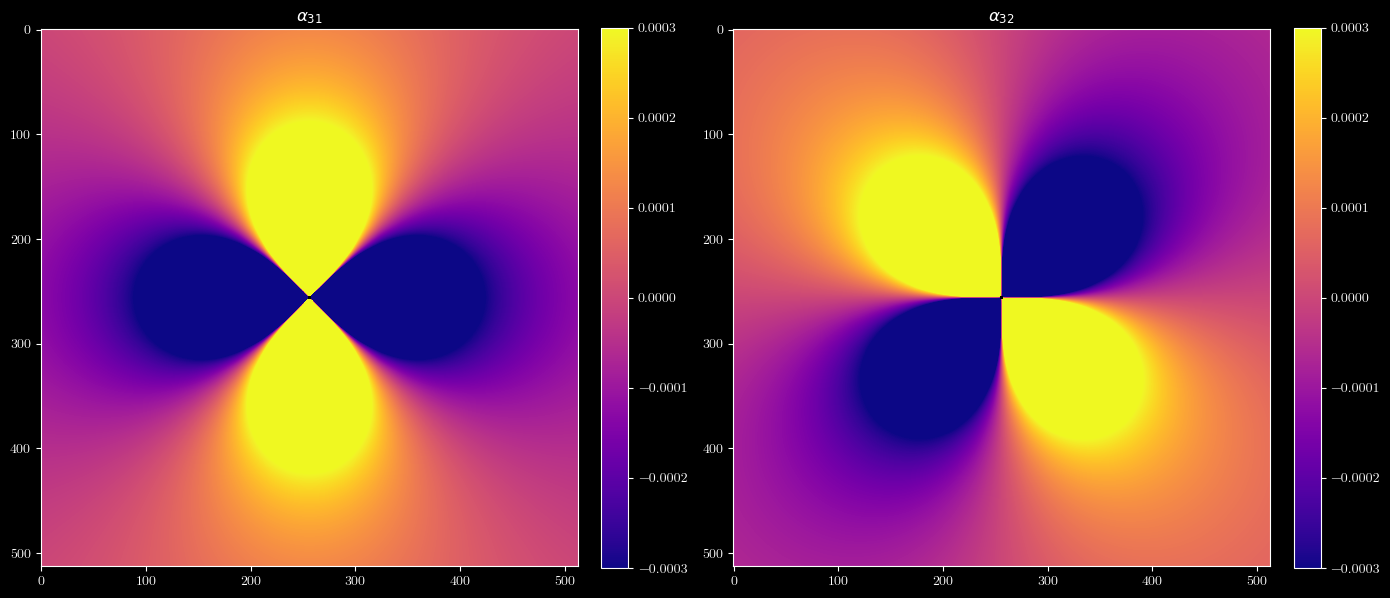

In [210]:
plt.style.use("dark_background")
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
im = ax[1].imshow(Z2, vmin=-0.0003, vmax=0.0003, cmap="plasma")
ax[1].set_title(r"$\alpha_{32}$")
fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)
im = ax[0].imshow(Z1, vmin=-0.0003, vmax=0.0003, cmap="plasma")
ax[0].set_title(r"$\alpha_{31}$")
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [ ]:
# print(pycode(beta_11).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_12).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_21).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_22).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))

beta_11 = (
    lambda x, y, bmag: (1 / 4)
    * bmag
    * y
    * (-2 * v * x**2 - 2 * v * y**2 + 3 * x**2 + y**2)
    / (
        np.pi
        * (v * x**4 + 2 * v * x**2 * y**2 + v * y**4 - x**4 - 2 * x**2 * y**2 - y**4)
    )
)
beta_12 = (
    lambda x, y, bmag: (1 / 4)
    * bmag
    * x
    * (2 * v * x**2 + 2 * v * y**2 - 3 * x**2 - y**2)
    / (
        np.pi
        * (v * x**4 + 2 * v * x**2 * y**2 + v * y**4 - x**4 - 2 * x**2 * y**2 - y**4)
    )
)
beta_21 = (
    lambda x, y, bmag: (1 / 4)
    * bmag
    * x
    * (-2 * v * x**2 - 2 * v * y**2 + x**2 + 3 * y**2)
    / (
        np.pi
        * (v * x**4 + 2 * v * x**2 * y**2 + v * y**4 - x**4 - 2 * x**2 * y**2 - y**4)
    )
)
beta_22 = (
    lambda x, y, bmag: (1 / 4)
    * bmag
    * y
    * (-2 * v * x**2 - 2 * v * y**2 - x**2 + y**2)
    / (
        np.pi
        * (v * x**4 + 2 * v * x**2 * y**2 + v * y**4 - x**4 - 2 * x**2 * y**2 - y**4)
    )
)


b11 = beta_11(X, Y, bmag)
b12 = beta_12(X, Y, bmag)
b21 = beta_21(X, Y, bmag)
b22 = beta_22(X, Y, bmag)

# burgers loop integral in riemann style
dx = xg[0] - xg[1]
a1 = b11[:, 0].sum() * dx
b1 = b12[-1, :].sum() * dx
c1 = -b11[:, -1].sum() * dx
d1 = -b12[0, :].sum() * dx
(a1 + b1 + c1 + d1)

-0.0004049686453775344

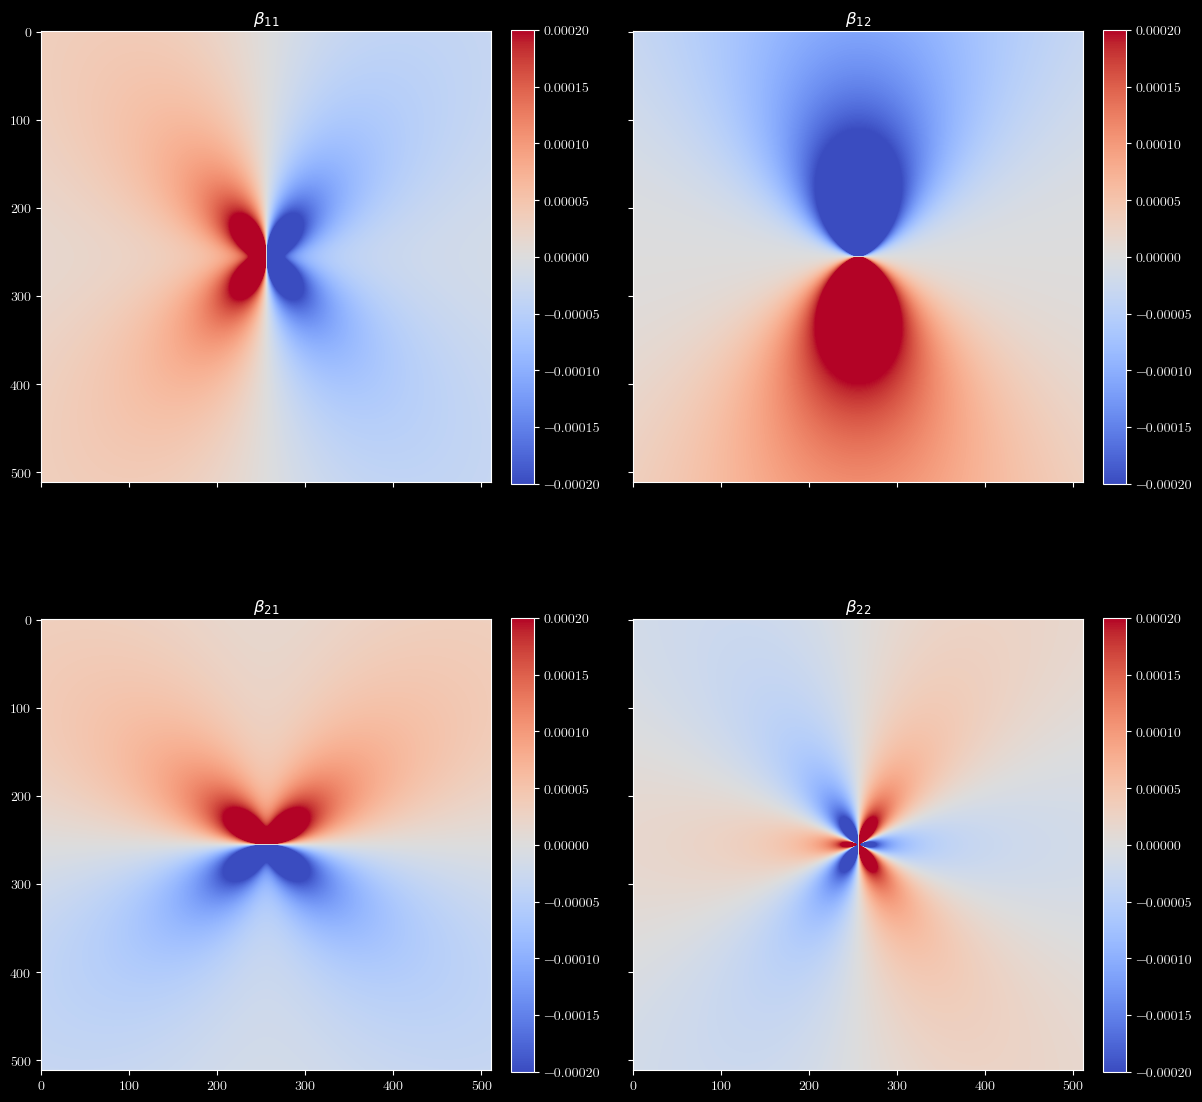

In [ ]:
plt.style.use("dark_background")
fig, ax = plt.subplots(2, 2, figsize=(14, 14), sharex=True, sharey=True)

im = ax[0, 0].imshow(b11, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[0, 0].set_title(r"$\beta_{11}$")
fig.colorbar(im, ax=ax[0, 0], fraction=0.046, pad=0.04)

im = ax[0, 1].imshow(b12, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[0, 1].set_title(r"$\beta_{12}$")
fig.colorbar(im, ax=ax[0, 1], fraction=0.046, pad=0.04)

im = ax[1, 0].imshow(b21, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[1, 0].set_title(r"$\beta_{21}$")
fig.colorbar(im, ax=ax[1, 0], fraction=0.046, pad=0.04)

im = ax[1, 1].imshow(b22, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[1, 1].set_title(r"$\beta_{22}$")
fig.colorbar(im, ax=ax[1, 1], fraction=0.046, pad=0.04)

plt.show()